<a href="https://colab.research.google.com/github/AlsabaShaikh/Titanic-prediction-using-ML/blob/main/Titanic_Survival_Prediction(new)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Titanic Survival Prediction .ipynb to Titanic Survival Prediction .ipynb


In [ ]:
Titanic_data=pd.read_csv("/content/train.csv.csv")
Titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
Titanic_data.shape

(891, 12)

In [ ]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

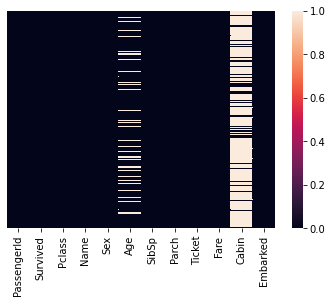

In [ ]:
sns.heatmap(Titanic_data.isnull(),yticklabels=False)

In [ ]:
Titanic_data=Titanic_data.drop(columns='Cabin',axis=1)

KeyError: ignored

In [ ]:
Titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [ ]:
Titanic_data['Age'].fillna(Titanic_data['Age'].mean(),inplace=True)

In [ ]:
print(Titanic_data['Embarked'].mode()[0])

S


In [ ]:
Titanic_data['Embarked'].fillna(Titanic_data['Embarked'].mode()[0],inplace=True)

In [ ]:
Titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [ ]:
Titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

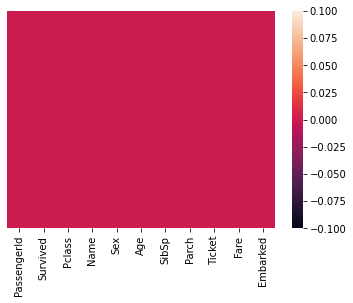

In [ ]:
sns.heatmap(Titanic_data.isnull(),yticklabels=False)

Titanic_data.isnull().sum()

In [ ]:
#Statistical data
Titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Counting the passengers survived and non-survived

Titanic_data['Survived'].value_counts()   #0=non survived
                                          #1=Survived

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
Titanic_data['Sex'].value_counts()

# Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


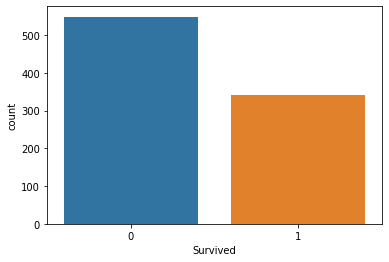

In [ ]:
sns.countplot('Survived',data=Titanic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


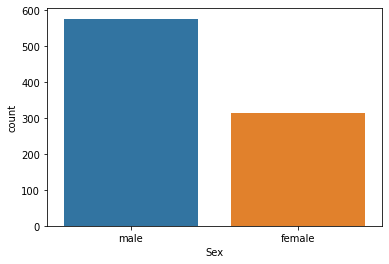

In [ ]:
sns.countplot('Sex',data=Titanic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


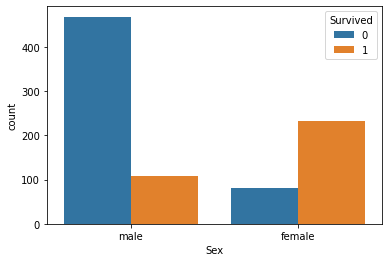

In [ ]:
#Number of survivors gender wise

sns.countplot('Sex',hue='Survived',data=Titanic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


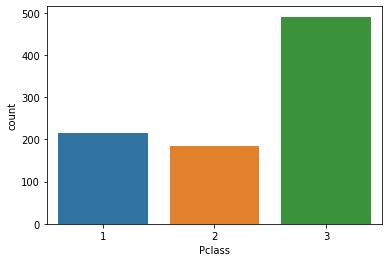

In [ ]:
sns.countplot('Pclass',data=Titanic_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


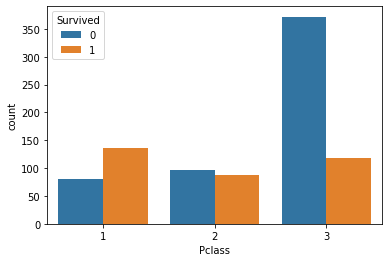

In [ ]:
sns.countplot('Pclass',hue='Survived',data=Titanic_data)

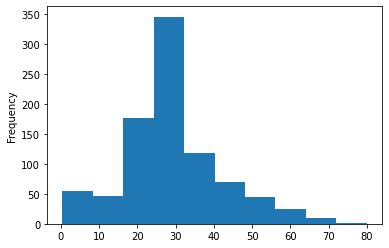

In [ ]:
Titanic_data["Age"].plot.hist()

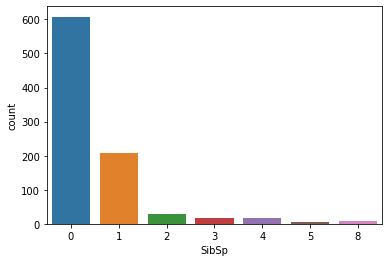

In [ ]:
sns.countplot(x="SibSp",data=Titanic_data)

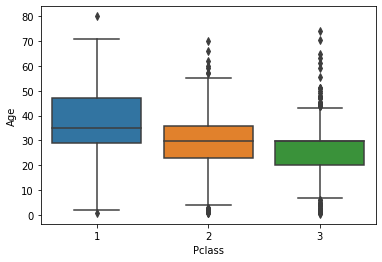

In [ ]:
sns.boxplot(x="Pclass",y="Age",data=Titanic_data)

In [ ]:

Titanic_data['Sex'].value_counts()



male      577
female    314
Name: Sex, dtype: int64

In [ ]:
Titanic_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
#Converting categorical

Titanic_datanew=Titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}})
Titanic_datanew

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,1


In [ ]:
#Separating features and target

X=Titanic_datanew.drop(columns=['PassengerId','Survived','Name','Ticket'])
Y=Titanic_datanew['Survived']

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.000000,1,0,7.2500,0
1,1,1,38.000000,1,0,71.2833,1
2,3,1,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0
887,1,1,19.000000,0,0,30.0000,0
888,3,1,29.699118,1,2,23.4500,0
889,1,0,26.000000,0,0,30.0000,1


In [ ]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Splitting the data into training data and Test Data

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


# Model training

# Logistic Regression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Accuracy on training data

X_train_prediction=model.predict(X_train)
print(X_train_prediction)

[0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0
 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0
 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0
 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0
 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1
 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1
 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1
 1 0 0 0 0 0 0 0 1 0 0 0 

In [ ]:
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)
print("Accuracy score of training data:", training_data_accuracy)

Accuracy score of training data: 0.8146067415730337


In [ ]:
# Accuracy for test data

In [ ]:
X_test_prediction=model.predict(X_test)
print(X_test_prediction)

[0 1 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1
 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1
 0 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0]


In [ ]:
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)
print("Accuracy score of test data:", test_data_accuracy)

Accuracy score of test data: 0.7597765363128491


In [ ]:
predict=model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print( classification_report(Y_test,predict))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       110
           1       0.70      0.67      0.68        69

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179



In [ ]:

#Precision Precision is the ratio of correctly predicted positive observations to the total predicted positive observations

#Recall Recall is the natio of correctly predicted positive observations to the all observations in actual class Ft sore-F1 Score is the weighted average of Precision and Recall

In [ ]:
import pickle
file=open('LogisticRegression.pkl','wb')
pickle.dump(model,file)

In [ ]:
#Predicting new data
input_data=(3,0,35,0,0,8.05,0)

In [ ]:
input_data_as_numpy_array=np.asarray(input_data)


In [ ]:
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

In [ ]:
prediction=model.predict(input_data_reshaped)
if prediction[0]==0:
  print("Dead")
if prediction[0]==1:
  print("Alive")

Dead


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
